### Objetivo:

* **Promover o uso do algoritmo de aprendizado supervisionado DecisionTree (Árvore de Decisão), aplicado à base de dados Iris, em 3 diferentes situações: usando a base de dados completa, usando a técnica de amostragem *hold-out* e usando a técnica *cross-validation*;**
<br><br>
* **Avaliar o desempenho do algoritmo nas diferentes situações, utilizando** <br><br>
    * **os próprios rótulos para as instâncias da base de dados Iris;**<br>
    * **o cálculo da métrica de avaliação para o modelo de classificação DecisionTreeClassifier: Acurácia;**
    * **o cálculo das métricas de avaliação para o modelo de regressão DecisionTreeRegressor: mean_squared_error e neg_mean_squared_error.**

In [1]:
# Importa algumas bibliotecas
from sklearn.tree import DecisionTreeClassifier # Importa o modelo de árvore de decisão para classificação
import sklearn.tree # Importa o módulo tree. É possível gerar um gráfico de árvore de decisão com uma de suas classes.
from sklearn.datasets import load_iris # importa o método load_iris

# Bibliotecas para criar DataFrame e gráficos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Árvore de Decisão para Classificação

**Alguns dos métodos presentes na classe DecisionTreeClassifier são**

* **Método fit --> Utilizado para treinar o modelo. Recebe um conjunto de dados separado em atributos previsores (parâmetro X) e atributo alvo (parâmetro y);**

* **Método predict --> Promove a previsão dos valores, após receber como parâmetro as amostras de entrada X.**

* **Método predict_proba --> Prevê as probabilidades das classes das amostras de entrada X.**

In [2]:
# Carrega os dados, separando-os em atributos previsores (X) e alvo (y)
X, y = load_iris(return_X_y=True)

In [3]:
# Instancia o modelo de árvore de decisão
model = DecisionTreeClassifier()

In [4]:
# Treina o modelo de árvore de decisão
model.fit(X=X, y=y)

DecisionTreeClassifier()

In [5]:
# Dicionário para mapear os rótulos numéricos para as suas respectivas espécies
dic = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [6]:
# DataFrame do conjunto de dados
df = pd.DataFrame(X, columns=['Comprimento das Sepalas', 'Largura das Sepalas', 'Comprimento das Petalas', 
                              'Largura das Petalas'])

In [7]:
# Exibe as 3 primeiras linhas do dataframe
df.head(3)

,Comprimento das Sepalas,Largura das Sepalas,Comprimento das Petalas,Largura das Petalas
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [8]:
# Cria a coluna especie e adiciona a essa coluna os rótulos da variável y
df['especie'] = y

In [9]:
# Substitui cada rótulo numérico na coluna especie pelo nome da espécie da planta
df['especie'] = df['especie'].apply(lambda i: dic[i])

In [10]:
# Previsão dos rótulos a partir dos atributos previsores
y_prevs = model.predict(X)

In [11]:
# Cria a coluna especie_prev e adiciona os dados da variável y_prevs a essa coluna
df['especie_prev'] = y_prevs

In [12]:
# Substitui cada rótulo numérico na coluna especie_prev pelo nome da espécie da planta
df['especie_prev'] = df['especie_prev'].apply(lambda i:dic[i])

In [13]:
# Exibe as 3 primeiras linhas do dataframe
df.head(3)

,Comprimento das Sepalas,Largura das Sepalas,Comprimento das Petalas,Largura das Petalas,especie,especie_prev
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,4.9,3.0,1.4,0.2,Setosa,Setosa
2,4.7,3.2,1.3,0.2,Setosa,Setosa


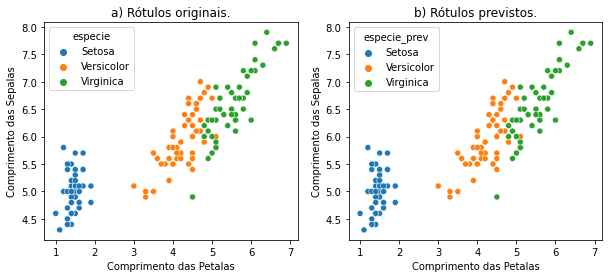

In [14]:
# Gráficos de distribuição dos dados originais e previstos
fig, axes = plt.subplots(1, 2, figsize=(10,4)) # Cria uma área de gráfico de tamanho específico

sns.scatterplot(x = df['Comprimento das Petalas'], y = df['Comprimento das Sepalas'], hue = df['especie'], ax=axes[0])
sns.scatterplot(x = df['Comprimento das Petalas'], y = df['Comprimento das Sepalas'], hue = df['especie_prev'], ax=axes[1])

# Configura os títulos de cada gráfico
axes[0].set_title('a) Rótulos originais.')
axes[1].set_title('b) Rótulos previstos.');

**Foi criada uma figura com 2 eixos para exibir a distribuição dos dados conforme os rótulos originais e os rótulos previstos. Devido ao conjunto de dados possuir 4 atributos previsores (Comprimento das Sepalas, Largura das Sepalas, Comprimento das Petalas e Largura das Petalas), 2 deles foram selecionados para criar os gráficos, já que, apesar de possível, fazer um gráfico com maior dimensão tornaria mais difícil comparar as instâncias.**<br><br>
**Percebe-se que o modelo foi capaz de prever todos os rótulos corretamente.**<br><br> 
**<font color='red'>NOTA</font>: Apesar do uso, para treino e teste, dos mesmos atributos previsores (X) não ser a melhor maneira de verificar a acurácia de qualquer modelo, isso foi feito apenas para fins didáticos. A ideia aqui é apenas exemplificar a utilização do algoritmo de árvore de decisão, servindo apenas como material introdutório.**

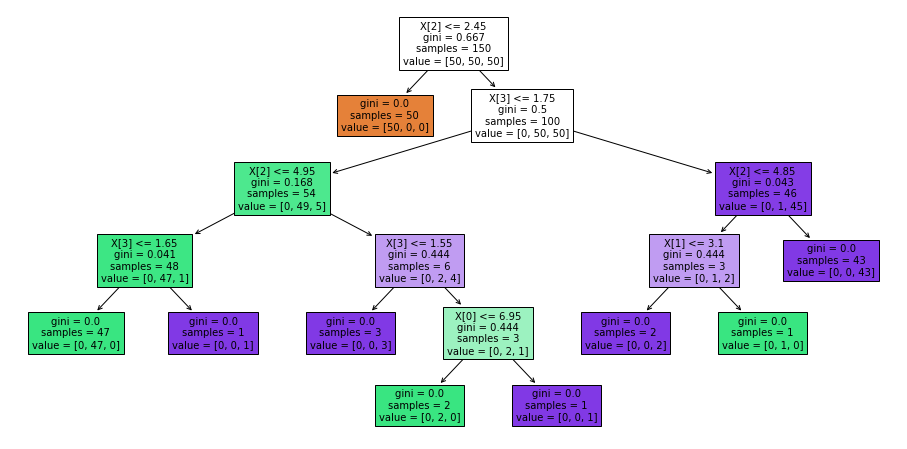

In [15]:
# Cria uma área de gráfico de tamanho específico
fig, ax = plt.subplots(figsize=(16, 8))

# Plota a árvore de decisão preenchida pela cor da classe que predomina no nó 
# (classe1 = laranja; classe2 = verde; classe3 = lilás)
arvore = sklearn.tree.plot_tree(model, max_depth=1000, fontsize=10, filled=True, ax=ax)

* **Percebe-se que apenas 1 teste é necessário para separar 1 das espécies das demais (classe1 = laranja), produzindo 1 nó folha já no primeiro nível de profundidade.**<br><br>

* **Dali em diante, para separar as outras 2 espécies, são necessários, pelo menos, mais 3 níveis.**<br><br>

* **Esse distanciamento para uma das classes já era esperado, uma vez que na figura anterior, com os gráficos de distribuição, é possível notar que uma das classes está agrupada com uma separação bem definida das demais.**

## Árvore de Decisão para Regressão

In [16]:
# Importa a classe da árvore de decisão para regressão e a biblioteca Numpy
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [17]:
# Cria um conjunto de dados aleatório, com 50 valores entre 0 e 1, que segue uma distribuição senoidal 
# de dados de um único período (2π)
XR = np.sort(2 * np.pi * np.random.rand(50, 1), axis=0)

In [18]:
# Exibe os 5 primeiros vetores
XR[0:5]

array([[0.12299731],
       [0.63373384],
       [0.99551326],
       [1.00691315],
       [1.34375725]])

In [19]:
# Retorna um array de 1D com todos os elementos do array de entrada (seno dos valores XR) e com o mesmo tipo
yR = np.sin(XR).ravel()

In [20]:
yR

array([ 0.12268742,  0.59215769,  0.83903833,  0.84518604,  0.97433715,
        0.99751866,  0.99844026,  0.927363  ,  0.89468767,  0.66787982,
        0.61199899,  0.57979704,  0.44662062,  0.24561383,  0.10272945,
       -0.01615236, -0.03098604, -0.15661225, -0.33723389, -0.41363911,
       -0.62405828, -0.63638366, -0.67078712, -0.68474454, -0.81346694,
       -0.82896364, -0.98356315, -0.98903908, -0.99299611, -0.99951445,
       -0.99878894, -0.99395551, -0.9931645 , -0.9819433 , -0.97852227,
       -0.95914683, -0.95290666, -0.93996628, -0.85708307, -0.85061241,
       -0.81459455, -0.80170789, -0.73468713, -0.66844203, -0.64883979,
       -0.6028307 , -0.50368669, -0.45817295, -0.18562361, -0.00112049])

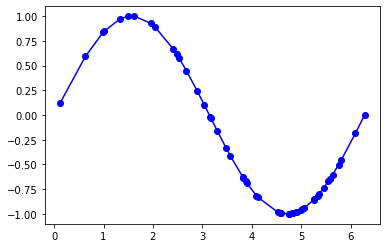

In [21]:
# Plota a senoide, destacando as instâncias
plt.plot(XR, yR, 'bo-');

In [22]:
# Cria dois novos modelos de árvore de decisão para regressão
modelR2 = DecisionTreeRegressor(max_depth=2)
modelR4 = DecisionTreeRegressor(max_depth=4)

In [23]:
# treina os modelos
modelR2.fit(X=XR, y=yR)
modelR4.fit(X=XR, y=yR);

In [24]:
# Previsão dos rótulos a partir dos atributos previsores
yR2_prevs = modelR2.predict(XR)
yR4_prevs = modelR4.predict(XR)

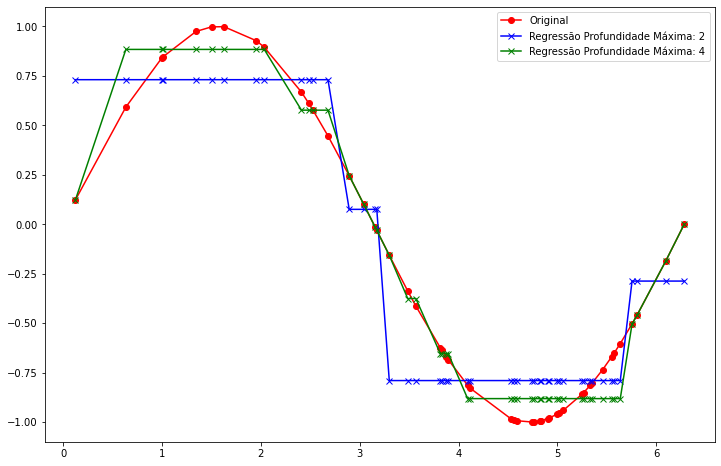

In [25]:
# Cria uma área de gráfico de tamanho específico
fig, ax = plt.subplots(figsize=(12,8))

# Cria um gráfico com as curvas referentes aos dados originais e previstos 
plt.plot(XR, yR, 'ro-', label = 'Original')
plt.plot(XR, yR2_prevs, 'bx-', label = 'Regressão Profundidade Máxima: 2')
plt.plot(XR, yR4_prevs, 'gx-', label = 'Regressão Profundidade Máxima: 4')
plt.legend();

**Assim como no caso da classificação, pode-se plotar as árvores de decisão para regressão criadas para as diferentes profundidades configuradas.**

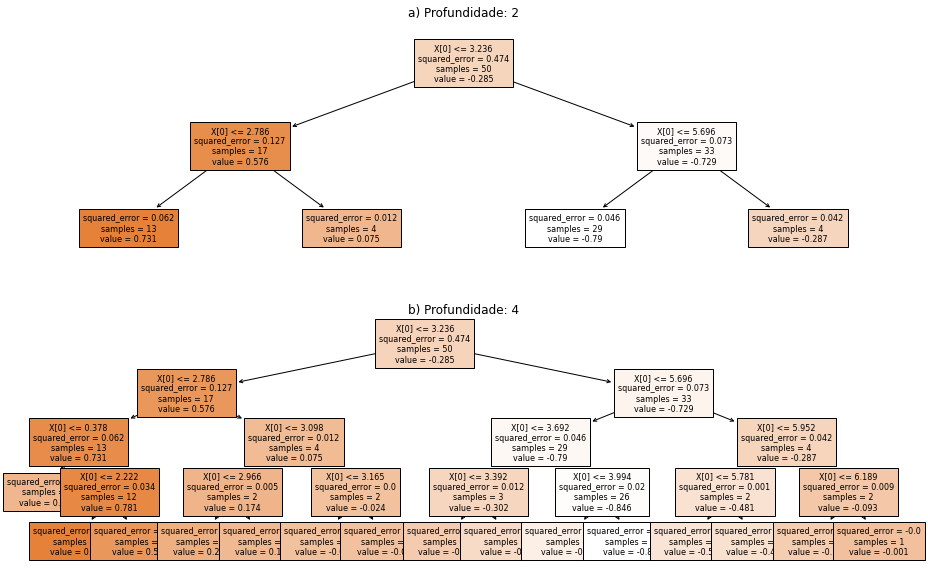

In [26]:
# Cria um gráfico com as árvores para regressão com as 2 diferentes profundidades
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
arvoreR2 = sklearn.tree.plot_tree(modelR2, fontsize=8, filled=True, ax=ax[0])
arvoreR4 = sklearn.tree.plot_tree(modelR4, fontsize=8, filled=True, ax=ax[1])
ax[0].set_title('a) Profundidade: 2')
ax[1].set_title('b) Profundidade: 4');

**Conclui-se que, qualquer que seja a configuração, em ambos os algoritmos (árvore de decisão para classificação ou regressão), uma árvore será construída para prever o atributo alvo.**

## Avaliação e Amostragem

**Para encontrar a melhor parametrização do modelo, é preciso utilizar métricas de avaliação.**<br><br>
**Em tarefas de aprendizado supervisionado, como é o caso das árvores de decisão para classificação e regressão, é possível comparar os valores previstos, obtidos a partir dos atributos previsores, com o atributo-alvo original e verificar a margem de erro, se for uma previsão por regressão, ou acurácia, se for classificação.**

**Nessa seção, serão utlizadas duas técnicas comuns de amostragem de dados: <font color='red'>*hold-out*</font> e <font color='red'>*cross-validation*</font>**

***hold-out*** --> o conjunto de dados é dividido em treinamento e teste. Isso reduz o tamanho do conjunto de treinamento, mas ainda mantém boa representatividade dos dados;

***cross-validation* (validação cruzada)** --> o conjunto de dados é dividido em vários grupos de mesmo tamanho e cada grupo serve uma vez como conjunto de teste, enquanto os demais são utilizados como treinamento.

**Formas de treinar o modelo:**<br>
* No ***hold-out***, uma vez definida a proporção adequada, o treinamento ocorre uma única vez e é mais afetado pela variação (ou aleatoriedade na seleção) do conjunto de dados.<br><br>

* No ***cross-validation***, o treinamento é efetuado tantas vezes quanto a quantidade de divisões criadas no conjunto de dados e o que importa é o valor médio entre todos os treinamentos.

### Aplicação do Hold-out no modelo de árvore de decisão para classificação

In [27]:
from sklearn.model_selection import train_test_split # Classe para dividir os dados em treinamento e teste
from sklearn.metrics import accuracy_score # Classe que avalia a acurácia do modelo de classificação.

In [28]:
# Carrega os dados, separando em atributos previsores (Xh) e alvo (yh)
Xh, yh = load_iris(return_X_y=True)

In [29]:
acc = [] # Lista para armazenar os valores de acurácia do modelo de árvore de decisão para classificação

# Valores usados para separar o conjunto de dados em dados de treinamento e teste 
# em diversas proporções (0.1, 0.2, 0.3, ..., 0.9) 
tt = np.arange(0.1, 1, 0.1)

# Seleciona cada proporção para os dados de teste
for t in tt:
    X_treino, X_teste, y_treino, y_teste = train_test_split(Xh, yh, test_size = t, random_state=4) # Separa os dados
    modelh = DecisionTreeClassifier(random_state=4) # Configura e instancia o modelo para classificação
    modelh.fit(X = X_treino, y = y_treino) # Treina o modelo
    acc.append(accuracy_score(y_teste, modelh.predict(X_teste))*100) # Adiciona o valor percentual da acurácia do modelo


pd.DataFrame(acc, index = tt*100, columns=['Acurácia']) # Transforma a lista com as acurácias em um dataframe 

,Acurácia
10.0,93.333333
20.0,96.666667
30.0,97.826087
40.0,96.666667
50.0,93.333333
60.0,93.333333
70.0,96.226415
80.0,97.500000
90.0,94.074074


**Pode-se verificar que os maiores valores de acurácia foram obtidos, dividindo-se o conjunto de dados em teste e treinamento, respectivamente, na proporção (30% / 70%) e (80% / 20%).**

### Aplicação do Cross-validation no modelo de árvore de decisão para classificação

In [30]:
# Importação da classe para validação cruzada
from sklearn.model_selection import cross_val_score

In [31]:
# Carrega os dados, separando em atributos previsores (Xc) e alvo (yc)
Xc, yc = load_iris(return_X_y=True)

In [32]:
acc = [] # Lista para armazenar os valores de acurácia do modelo de árvore de decisão para classificação
dfc = pd.DataFrame() # Dataframe vazio para transformar a lista com os valores de acurácia em um dataframe

# Faz validação cruzada com diferentes random-states. Valores (#r) variam entre 1 e 4.
for r in range(1, 5, 1):
    modelc = DecisionTreeClassifier(random_state=r) # Configura e instancia o modelo para classificação
    s = 'Acurácia R' + str(r) # Cria o nome para uma nova coluna dataframe (Acurácia #r)
    cross = cross_val_score(modelc, Xc, yc, cv=10, scoring='accuracy')*100 #Validação cruzada - dados particionados em 10 grupos
    cross = np.append(cross, sum(cross)/10) # Adiciona a média dos valores de acurácia na lista cross
    dfc[s] = cross # Cria uma coluna com o nome Acurácia R# e insere os valores de acurácia nessa coluna

In [33]:
# Exibe o dataframe com os valores de acurácia, onde o valor de índice 10 é a média dos valores anteriores
dfc

,Acurácia R1,Acurácia R2,Acurácia R3,Acurácia R4
0,100.000000,100.000000,100.000000,100.000000
1,93.333333,93.333333,93.333333,93.333333
2,100.000000,100.000000,100.000000,100.000000
3,93.333333,93.333333,93.333333,93.333333
4,93.333333,93.333333,93.333333,93.333333
5,86.666667,86.666667,86.666667,86.666667
6,93.333333,93.333333,93.333333,93.333333
7,93.333333,100.000000,100.000000,100.000000
8,100.000000,100.000000,100.000000,100.000000
9,100.000000,100.000000,100.000000,100.000000


**A última linha (10) indica a média de todas as acurácias anteriores (média dos valores de índice 0 ao 9).**<br><br>
**Percebe-se pela tabela que, independentemente da aleatoriedade na separação dos dados gerado pelo hiperparâmetro <font color='red'>random_state</font>, a acurácia média permaneceu sempre próxima de 96%, sendo um indicador mais confiável do desempenho do modelo.**

**Tanto o <font color='red'>*hold-out*</font> quanto o <font color='red'>*cross-validation*</font> são utilizados em tarefas de regressão também. Entretanto, as métricas de avaliação são outras, já que o alvo, nesse caso, é um valor contínuo.**

**Se a <font color='red'>acurácia</font> é uma das métricas mais utilizadas em classificadores, o <font color='red'>erro quadrático médio</font> desempenha papel similar nos regressores.**

### Aplicação do hold-out no modelo de árvore de decisão para regressão

In [34]:
from sklearn.metrics import mean_squared_error # Classe para o cálculo do Erro Quadrático Médio (MSE, Mean Squared Error)

In [35]:
# Cria um conjunto de dados aleatório, com 50 valores entre 0 e 1, que segue uma distribuição senoidal 
# de dados de um único período (2π)
Xh = np.sort(2*np.pi * np.random.rand(50, 1), axis=0)

In [36]:
# Retorna um array de 1D com todos os elementos do array de entrada (seno dos valores Xh) e com o mesmo tipo
yh = np.sin(Xh).ravel()

In [37]:
mse = [] # Lista para armazenar os valores de MSE do modelo de árvore de decisão para regressão

# Valores usados para separar o conjunto de dados em dados de treinamento e teste 
# em diversas proporções (0.1, 0.2, 0.3, ..., 0.9)
tt = np.arange(0.1, 1, 0.1)

for t in tt:
    X_treino, X_teste, y_treino, y_teste = train_test_split(Xh, yh, test_size = t, random_state=4) # Separa os dados
    modelh = DecisionTreeRegressor(random_state=4) # Configura e instancia o modelo para regressão
    modelh.fit(X = X_treino, y = y_treino) # Treina o modelo
    mse.append(mean_squared_error(y_teste, modelh.predict(X_teste))*1000) # Adiciona o valor * 1000 do MSE do modelo

pd.DataFrame(mse, index=tt*100, columns=['MSE * 1000']) # Transforma a lista com os valores de MSE em um dataframe 

,MSE * 1000
10.0,1.222541
20.0,4.860688
30.0,8.364896
40.0,7.693765
50.0,13.197040
60.0,41.064509
70.0,43.393580
80.0,82.187830
90.0,144.366642


**Ao contrário da acurácia, busca-se obter o <font color = 'red'>menor valor possível</font> de erro quadrático médio (MSE).**
<br><br>
**Nesse caso, a proporção de 40% de instâncias para o conjunto de treinamento apresentou o melhor desempenho.**
<br><br>
**Entretanto, assim como na classificação, o <font color = 'red'>*hold-out*</font> pode impactar bastante o resultado pela aleatoriedade da amostragem dos dados, gerado pelo hiperparâmetro <font color = 'red'>*random-state*</font>.**


### Aplicação do cross-validation no modelo de árvore de decisão para regressão

**Vale destacar que, nessa seção, o método <font color='red'>cross_val_score</font> usa o parâmetro <font color='red'>scoring</font> = <font color='green'>*'neg_mean_squared_error'*</font>, antes igual a <font color='green'>*'accuracy'*</font>**.


In [38]:
# Importação da classe para validação cruzada
from sklearn.model_selection import cross_val_score

In [39]:
# Cria um conjunto de dados aleatório, com 50 valores entre 0 e 1, que segue uma distribuição senoidal 
# de dados de um único período (2π)
Xc = np.sort(2*np.pi * np.random.rand(50, 1), axis = 0)

In [40]:
# Retorna um array de 1D com todos os elementos do array de entrada (seno dos valores Xc) e com o mesmo tipo
yc = np.sin(Xc).ravel()

In [41]:
dfc = pd.DataFrame()

# Configura o modelo para árvores de decisão com diferentes profundidades (de 2 a 9)
for d in range(2, 10, 1):
    modelc = DecisionTreeRegressor(max_depth=d) # Configura e instancia o modelo para regressão
    s = '-MSE * 100 D=' + str(d) # Cria o nome para uma nova coluna dataframe
    cross = cross_val_score(modelc, Xc, yc, cv=10, scoring='neg_mean_squared_error')*100 # Validação cruzada, com grupo = 10
    cross = np.append(cross, sum(cross)/10) # Adiciona a média dos valores de MSE negativo na lista cross
    dfc[s] = cross # Cria uma coluna com o nome -MSE D=# e insere os valores de MSE negativo nessa coluna

In [42]:
# Exibe o dataframe com os valores de MSE negativo, onde o valor de índice 10 é a média dos valores anteriores
dfc

,-MSE * 100 D=2,-MSE * 100 D=3,-MSE * 100 D=4,-MSE * 100 D=5,-MSE * 100 D=6,-MSE * 100 D=7,-MSE * 100 D=8,-MSE * 100 D=9
0,-5.871788,-8.727054,-9.966088,-5.593614,-5.563216,-5.563216,-5.563216,-5.563216
1,-2.150428,-1.147142,-0.414071,-0.705559,-0.188623,-0.187481,-0.187620,-0.187381
2,-3.753445,-2.313227,-0.960947,-0.717844,-0.496278,-0.144059,-0.179137,-0.151138
3,-0.228954,-0.552211,-0.920200,-0.725562,-0.290068,-0.290068,-0.290068,-0.290068
4,-2.832813,-3.534677,-1.493343,-1.016982,-0.993815,-0.993815,-0.993815,-0.993815
5,-14.000505,-4.982499,-3.779105,-3.125709,-3.125709,-3.125709,-3.125709,-3.125709
6,-18.072914,-8.069290,-8.998495,-6.053439,-6.053439,-6.053439,-6.053439,-6.053439
7,-11.343728,-5.803261,-3.827939,-1.913506,-1.331172,-1.298133,-1.293927,-1.293927
8,-8.376809,-3.634934,-0.478606,-0.285058,-0.165393,-0.191875,-0.238258,-0.232367
9,-31.768905,-24.344651,-24.264430,-24.264430,-24.264430,-24.264430,-24.264430,-24.264430


**A última linha (10) indica a média de todas as amostragens anteriores (média dos valores do índice 0 ao 9).**
<br><br>
**O MSE varia com a profundidade da árvore e com os grupos da validação cruzada.**

**Os classificadores e os regressores possuem muitas métricas disponíveis para a avaliação.**

* **Um classificador buscará a avaliação de erros e acertos usando acurácia, índice de sensibilidade, especificidade, precisão, etc., onde todos dependem dos valores verdadeiros/falsos ou positivos/negativos;**<br><br>

* **um regressor, por sua vez, utilizará medições contínuas, como erro quadrático, erro absoluto, desvio, etc.**